In [5]:
#Classification in textual data
import pandas as pd
import seaborn as sns
df=pd.read_csv("C:\\Users\\user\\Downloads\\Amazon_Unlocked_Mobile.csv")
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [6]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [9]:
df.shape

(413840, 6)

In [10]:
df.isnull().sum().sort_values(ascending=False) #checking for null value

Brand Name      65171
Review Votes    12296
Price            5933
Reviews            62
Rating              0
Product Name        0
dtype: int64

In [11]:
df.dropna(inplace=True)  #removing null value

In [12]:
df.isnull().sum().sort_values(ascending=False)

Review Votes    0
Reviews         0
Rating          0
Price           0
Brand Name      0
Product Name    0
dtype: int64

In [13]:
df['Rating'].value_counts()

5    180253
1     57535
4     50421
3     26058
2     20068
Name: Rating, dtype: int64

In [18]:
df=df[df['Rating']!=3]  #removing 3rd rating

In [19]:
df['Rating'].value_counts() #5 and 4 as positive reviews=> giving 1
#2 and 1 negatively rated => sow e are going to give 0

5    180253
1     57535
4     50421
2     20068
Name: Rating, dtype: int64

In [20]:
import numpy as np
df["Positively Rated"]=np.where(df["Rating"]>3,1,0) #rating greater than 3 is 1, others 0

C:\Users\user\anaconda3\envs\pythomopencv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
df["Positively Rated"]

0         1
1         1
2         1
3         1
4         1
         ..
413832    1
413834    0
413835    1
413837    1
413839    1
Name: Positively Rated, Length: 308277, dtype: int32

In [26]:
df["Positively Rated"].value_counts()

1    230674
0     77603
Name: Positively Rated, dtype: int64

C:\Users\user\anaconda3\envs\pythomopencv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Positively Rated', ylabel='count'>

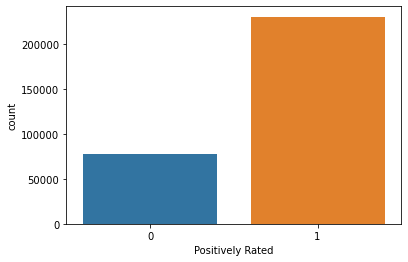

In [22]:
sns.countplot(df["Positively Rated"])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(df["Reviews"],df["Positively Rated"],random_state=0)

In [27]:
X_train[0]

"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!"

In [28]:
#tfidf vectorizer to get significant features

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vect=TfidfVectorizer().fit(X_train)

In [31]:
len(vect.get_feature_names())

53216

In [38]:
X_train_vectorized=vect.transform(X_train)

In [33]:
#naive base is best in NLP
#Here we are going to use logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
model=LogisticRegression()

In [39]:
model.fit(X_train_vectorized,y_train)

C:\Users\user\anaconda3\envs\pythomopencv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [43]:
predictions=model.predict(vect.transform(X_test))
predictions

array([1, 0, 1, ..., 0, 1, 1])

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print(accuracy_score(y_test,predictions))

0.9494096276112625
